In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('tweets.csv')
df

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [4]:
df['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [5]:
df.isna().sum()

id       0
label    0
tweet    0
dtype: int64

# Tweets preprocessing

In [6]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 15.4 MB/s eta 0:00:00


In [7]:
import nltk
nltk.download('stopwords')
import re
import unidecode
from nltk.tokenize.toktok import ToktokTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\^^", "", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text

In [9]:
def clean_keywords(word):
    return re.sub(r'%20', ' ', word)
def to_lowercase(word):
    return word.lower()
def remove_accents(word):
    return unidecode.unidecode(word)
def remove_punctuation(word):
    return re.sub(r"[!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n -' ]"," ",word)

In [10]:
def cleaning_URLs(word):
    return re.sub('((www.[^s]+)|(https?:\/\/.*?[\s+]))',' ',word)
def remove_mentions(word):
    return re.sub('@[\w]*',' ',word)

In [11]:
#Setting English stopwords
tokenizer1 = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer1.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

Removing all hyperlinks

In [12]:
df['cleaned_tweet'] = df['tweet'].apply(lambda x: cleaning_URLs(x))

Removing and replacing certain patterns

In [13]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: remove_special_characters(x))

Removing @mentions of users

In [14]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: remove_mentions(x))

Removing all special characters

In [15]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: remove_punctuation(x))

Converting everything to unicode characters

In [16]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: remove_accents(x))

Convert everything to lowercase

In [17]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: to_lowercase(x))

Removing stopwords using NLTK corpus library

In [18]:
df['final_cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: remove_stopwords(x, True))

In [19]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

Applying stemming

In [20]:
def simple_stemmer(text):
    ps = stemmer
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [21]:
df['final_cleaned_tweet']= df['final_cleaned_tweet'].apply(simple_stemmer)
df['cleaned_tweet']= df['cleaned_tweet'].apply(simple_stemmer)

In [22]:
df

,id,label,tweet,cleaned_tweet,final_cleaned_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnanc test android app beauti c...,fingerprint pregnanc test android app beauti c...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,final a transpar silicon case thank to my uncl...,final transpar silicon case thank uncl yay son...
2,3,0,We love this! Would you go? #talk #makememorie...,we love thi would you go talk makememori unplu...,love would go talk makememori unplug relax iph...
3,4,0,I'm wired I know I'm George I was made that wa...,im wire i know im georg i wa made that way iph...,im wire know im georg made way iphon cute dave...
4,5,1,What amazing service! Apple won't even talk to...,what amaz servic appl wont even talk to me abo...,amaz servic appl wont even talk question unles...
...,...,...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...,live out loud lol liveoutloud selfi smile soni...,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,We would like to wish you an amazing day! Make...,we would like to wish you an amaz day make eve...,would like wish amaz day make everi minut coun...
7917,7918,0,Helping my lovely 90 year old neighbor with he...,help my love 90 year old neighbor with her ipa...,help love 90 year old neighbor ipad morn made ...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...,final got my smart pocket wifi stay connect an...,final got smart pocket wifi stay connect anyti...


# Bag of Words model

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
bow_model = CountVectorizer(stop_words="english", ngram_range=(1,1))
bow_vector = bow_model.fit_transform(df['final_cleaned_tweet']).todense()

In [25]:
bow_df = pd.DataFrame(bow_vector)
bow_df.columns = sorted(bow_model.vocabulary_)
bow_df.head()

,000,00000,002,004,0051,007,008,01,010111,0101am,...,zs,zsofimonst,ztjeq,zumi,zune,zunehd,zurich,zv7tuur,zw1ck,zx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [27]:
x_train, x_test, y_train, y_test = train_test_split(bow_df, df['label'], test_size=0.15, random_state=134)

Using Logistic Regression

In [28]:
bow_log = LogisticRegression(fit_intercept=False)
bow_log.fit(x_train, y_train)
y_pred_bow_log = bow_log.predict(x_test)
print("Accuracy score of Bag of words model using logistic regression: " + str(round(accuracy_score(y_test, y_pred_bow_log) * 100, 2)) + "%")

Accuracy score of Bag of words model using logistic regression: 87.21%


Using Decision Tree Classifier

In [29]:
bow_dt = DecisionTreeClassifier()
bow_dt.fit(x_train, y_train)
y_pred_bow_dt = bow_dt.predict(x_test)
print("Accuracy score of Bag of words model using Decision Tree Classifier: " + str(round(accuracy_score(y_test, y_pred_bow_dt) * 100, 2)) + "%")

Accuracy score of Bag of words model using Decision Tree Classifier: 85.27%


Using Gaussian Naive Bayes

In [30]:
bow_gnb = GaussianNB()
bow_gnb.fit(x_train, y_train)
y_pred_bow_gnb = bow_gnb.predict(x_test)
print("Accuracy score of Bag of words model using Gaussian Naive Bayes: " + str(round(accuracy_score(y_test, y_pred_bow_gnb) * 100, 2)) + "%")

Accuracy score of Bag of words model using Gaussian Naive Bayes: 77.69%


# TFIDF Model

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf = TfidfVectorizer()
tdfif_dense = tfidf.fit_transform(df['final_cleaned_tweet']).todense()

In [33]:
tfidf_df = pd.DataFrame(tdfif_dense)
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,19190,19191,19192,19193,19194,19195,19196,19197,19198,19199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_df, df['label'], test_size=0.15, random_state=134)

Using Logistic Regression

In [35]:
tfidf_log = LogisticRegression(fit_intercept=False)
tfidf_log.fit(x_train, y_train)
y_pred_tfidf_log = tfidf_log.predict(x_test)
print("Accuracy score of TFIDF model using logistic regression: " + str(round(accuracy_score(y_test, y_pred_tfidf_log) * 100, 2)) + "%")

Accuracy score of TFIDF model using logistic regression: 87.71%


Using Decision Tree Classifier

In [36]:
tfidf_dt = DecisionTreeClassifier()
tfidf_dt.fit(x_train, y_train)
y_pred_tfidf_dt = tfidf_dt.predict(x_test)
print("Accuracy score of TFIDF model using Decision Tree Classifier: " + str(round(accuracy_score(y_test, y_pred_tfidf_dt) * 100, 2)) + "%")

Accuracy score of TFIDF model using Decision Tree Classifier: 82.41%


Using Gaussian Naive Bayes

In [37]:
tfidf_gnb = GaussianNB()
tfidf_gnb.fit(x_train, y_train)
y_pred_tfidf_gnb = tfidf_gnb.predict(x_test)
print("Accuracy score of TFIDF model using Gaussian Naive Bayes: " + str(round(accuracy_score(y_test, y_pred_tfidf_gnb) * 100, 2)) + "%")

Accuracy score of TFIDF model using Gaussian Naive Bayes: 77.61%


# Word Embeddings Models

In [38]:
from gensim.models import Word2Vec as wtv

In [39]:
preprocessed_text = df['cleaned_tweet'].apply(lambda x: x.split())
preprocessed_text

0       [fingerprint, pregnanc, test, android, app, be...
1       [final, a, transpar, silicon, case, thank, to,...
2       [we, love, thi, would, you, go, talk, makememo...
3       [im, wire, i, know, im, georg, i, wa, made, th...
4       [what, amaz, servic, appl, wont, even, talk, t...
                              ...                        
7915    [live, out, loud, lol, liveoutloud, selfi, smi...
7916    [we, would, like, to, wish, you, an, amaz, day...
7917    [help, my, love, 90, year, old, neighbor, with...
7918    [final, got, my, smart, pocket, wifi, stay, co...
7919    [appl, barcelona, appl, store, bcn, barcelona,...
Name: cleaned_tweet, Length: 7920, dtype: object

Creating Cbow & skipgram models

In [40]:
cbow_w2v_model = wtv(preprocessed_text, vector_size=800, window=5, min_count=3, sg=0)
skgram_w2v_model = wtv(preprocessed_text, vector_size=800, window=5, min_count=3, sg=1)

In [41]:
print("cbow vocabulary size:", len(cbow_w2v_model.wv.index_to_key))
print("skipgram vocabulary size:", len(skgram_w2v_model.wv.index_to_key))

cbow vocabulary size: 3731
skipgram vocabulary size: 3731


Function to return average word embedding vector value

In [42]:
def get_embedding_w2v(doc_tokens, model):
    embeddings = []
    for tok in doc_tokens:
      if tok in model.wv.index_to_key:
          embeddings.append(model.wv.get_vector(tok))
    return np.mean(embeddings, axis=0)

### Skipgram model

In [43]:
X_x2v_model = preprocessed_text.apply(lambda x: get_embedding_w2v(x, skgram_w2v_model))
X_df_sg = pd.DataFrame(X_x2v_model.to_list())

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X_df_sg, df['label'], test_size=0.15, random_state=134)

Using Logistic Regression

In [45]:
sg_log = LogisticRegression(fit_intercept=False)
sg_log.fit(x_train, y_train)
y_pred_sg_log = sg_log.predict(x_test)
print("Accuracy score of Skipgram model using logistic regression: " + str(round(accuracy_score(y_test, y_pred_sg_log) * 100, 2)) + "%")

Accuracy score of Skipgram model using logistic regression: 88.47%


Using Decision tree classifier

In [46]:
sg_dt = DecisionTreeClassifier()
sg_dt.fit(x_train, y_train)
y_pred_sg_dt = sg_dt.predict(x_test)
print("Accuracy score of Skipgram model using Decision Tree Classifier: " + str(round(accuracy_score(y_test, y_pred_sg_dt) * 100, 2)) + "%")

Accuracy score of Skipgram model using Decision Tree Classifier: 82.58%


Using Gaussian Naive Bayes

In [47]:
sg_gnb = GaussianNB()
sg_gnb.fit(x_train, y_train)
y_pred_sg_gnb = sg_gnb.predict(x_test)
print("Accuracy score of Skipgram model using Gaussian Naive Bayes: " + str(round(accuracy_score(y_test, y_pred_sg_gnb) * 100, 2)) + "%")

Accuracy score of Skipgram model using Gaussian Naive Bayes: 82.83%


### Cbow model

In [48]:
X_x2v_model = preprocessed_text.apply(lambda x: get_embedding_w2v(x, cbow_w2v_model))
X_df_cbow = pd.DataFrame(X_x2v_model.to_list())

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X_df_cbow, df['label'], test_size=0.15, random_state=134)

In [50]:
cbow_log = LogisticRegression(fit_intercept=False)
cbow_log.fit(x_train, y_train)
y_pred_cbow_log = cbow_log.predict(x_test)
print("Accuracy score of Cbow model using logistic regression: " + str(round(accuracy_score(y_test, y_pred_cbow_log) * 100, 2)) + "%")

Accuracy score of Cbow model using logistic regression: 85.77%


In [51]:
cbow_dt = DecisionTreeClassifier()
cbow_dt.fit(x_train, y_train)
y_pred_cbow_dt = cbow_dt.predict(x_test)
print("Accuracy score of Cbow model using Decision Tree Classifier: " + str(round(accuracy_score(y_test, y_pred_cbow_dt) * 100, 2)) + "%")

Accuracy score of Cbow model using Decision Tree Classifier: 80.89%


In [52]:
cbow_gnb = GaussianNB()
cbow_gnb.fit(x_train, y_train)
y_pred_cbow_gnb = cbow_gnb.predict(x_test)
print("Accuracy score of Cbow model using Gaussian Naive Bayes: " + str(round(accuracy_score(y_test, y_pred_cbow_gnb) * 100, 2)) + "%")

Accuracy score of Cbow model using Gaussian Naive Bayes: 78.96%


# DeepLearning Model

In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [54]:
tweets = df['final_cleaned_tweet'].to_list()
labels = df['label'].to_list()

In [55]:
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(tweets)

In [56]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

19231

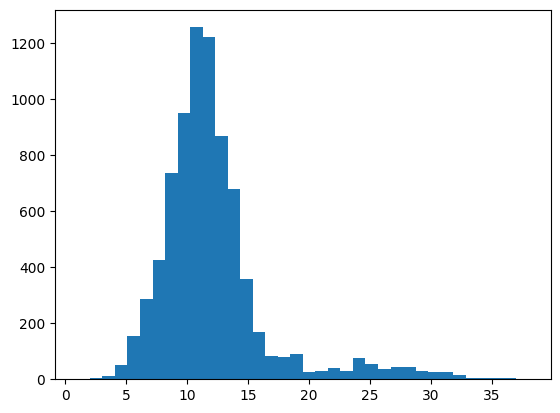

In [57]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

based on the graph, we'll choose 35 as the maximum number of words per tweet

In [58]:
maxlen = 35
def get_seqeuences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating="post", padding="post", maxlen=maxlen)
  return padded

In [59]:
padded_tweets = get_seqeuences(tokenizer, tweets)
padded_tweets_df = pd.DataFrame(padded_tweets)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(padded_tweets_df, np.array(labels), test_size=0.15, random_state=134)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
model = Sequential()
model.add(Embedding(vocab_size, 16, input_length = maxlen))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 16)            307696    
                                                                 
 bidirectional (Bidirectiona  (None, 35, 64)           12544     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 345,137
Trainable params: 345,137
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, callbacks=[EarlyStopping(monitor='val_accuracy', patience=2)])

Epoch 1/30
211/211 [==============================] - 42s 143ms/step - loss: 0.4087 - accuracy: 0.8145 - val_loss: 0.2684 - val_accuracy: 0.8914
Epoch 2/30
211/211 [==============================] - 6s 27ms/step - loss: 0.1843 - accuracy: 0.9254 - val_loss: 0.2875 - val_accuracy: 0.8746
Epoch 3/30
211/211 [==============================] - 4s 18ms/step - loss: 0.1115 - accuracy: 0.9600 - val_loss: 0.2979 - val_accuracy: 0.8771


In [64]:
DL_model_accuracy = model.evaluate(x_test, y_test)[1]
DL_model_accuracy

38/38 [==============================] - 0s 5ms/step - loss: 0.2979 - accuracy: 0.8771


0.8771044015884399

# Conclusion

In [65]:
predictions = ((y_pred_bow_log, y_pred_bow_dt, y_pred_bow_gnb, None),
           (y_pred_tfidf_log, y_pred_tfidf_dt, y_pred_tfidf_gnb, None),
           (y_pred_sg_log, y_pred_sg_dt, y_pred_sg_gnb, None),
           (y_pred_cbow_log, y_pred_cbow_dt, y_pred_cbow_gnb, None),
           (None, None, None, DL_model_accuracy))

In [66]:
rounded_accuracy_scores = []
for item in predictions:
    temp = []
    for val in item:
        if isinstance(val, np.ndarray):
            temp.append(round(accuracy_score(y_test, val) * 100, 2))
        elif isinstance(val, float):
            temp.append(round(val * 100, 2))
        else:
            temp.append(None)
    rounded_accuracy_scores.append(temp)

In [67]:
algorithms = ("Logistic Regression", "Decision Tree", "Naive Bayes", "Deep Learning")
models = ("Bag of Words", "TFIDF", "Skipgram", "Cbow", "Deep Learning")

results_df = pd.DataFrame(rounded_accuracy_scores, columns=algorithms)
results_df['models'] = models
results_df.insert(0, 'models', results_df.pop("models"))
results_df.set_index('models', inplace=True)

### Accuracy scores dataframe

In [68]:
results_df

,Logistic Regression,Decision Tree,Naive Bayes,Deep Learning
models,,,,
Bag of Words,87.21,85.27,77.69,NaN
TFIDF,87.71,82.41,77.61,NaN
Skipgram,88.47,82.58,82.83,NaN
Cbow,85.77,80.89,78.96,NaN
Deep Learning,NaN,NaN,NaN,87.71


### From the data the Skipgram model using Logistic regression gives the best accuracy score of 88.47%